In [1]:
import re, sys
import nilearn
from nilearn import plotting, input_data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline
from pieman_utils import *
import seaborn as sns
from nilearn.image import new_img_like
from scipy.io.wavfile import write

from IPython.display import Audio
from scipy.io import wavfile

from scipy.stats import zscore
import warnings
warnings.filterwarnings("ignore")

/opt/anaconda3/envs/neuroimaging/lib/python3.9/site-packages/nilearn/datasets/__init__.py:87: FutureWarning: Fetchers from the nilearn.datasets module will be updated in version 0.9 to return python strings instead of bytes and Pandas dataframes instead of Numpy arrays.
  warn("Fetchers from the nilearn.datasets module will be "


In [2]:
sound_file = '../data_pieman/pieman.wav'
samplerate, sounddata = wavfile.read(sound_file)
#print(data.shape[0]/samplerate)
print(samplerate)

8000


In [20]:
sounddata.shape[0]/samplerate

450.0

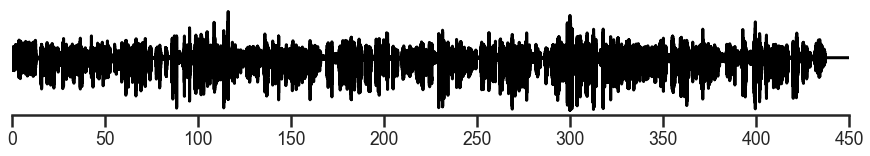

In [85]:
sns.set_context("poster", font_scale = 0.8, rc={"grid.linewidth": 0.6});
sns.set_style('ticks')

plt.figure(figsize= (15,2));
plt.plot(sounddata, color ='black');
plt.xlim([0,sounddata.shape[0]]);
sns.despine(left=True);
plt.yticks([]) ;
plt.xlim([0, sounddata.shape[0]]);
plt.xticks(np.arange(0,sounddata.shape[0]+1, 50*samplerate), np.arange(0,451,50));
#plt.xticklabels(np.arange(0,450,50));


([<matplotlib.axis.XTick at 0x7fe58574f550>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

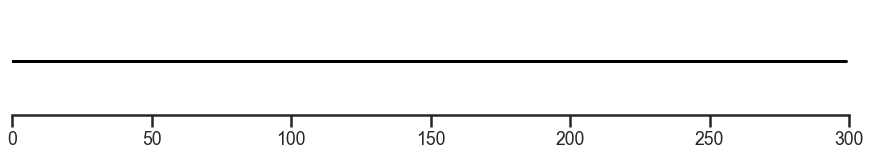

In [84]:
sns.set(font_scale=1.2)
sns.set_style('ticks')
sns.set_context("poster", font_scale = 0.8, rc={"grid.linewidth": 0.6});

ax = plt.figure(figsize= (15,2));
plt.plot(np.zeros(300), color ='black');
plt.xlim([0,sounddata.shape[0]]);
sns.despine(left=True);
plt.yticks([]) ;
plt.xlim([0, 300]);
plt.xticks(np.arange(0,301, 50))# np.arange(0,301,50));
#plt.xticklabels(np.arange(0,450,50));


In [57]:
sns.plotting_context()


{'font.size': 24.0,
 'axes.labelsize': 24.0,
 'axes.titlesize': 24.0,
 'xtick.labelsize': 22.0,
 'ytick.labelsize': 22.0,
 'legend.fontsize': 22.0,
 'axes.linewidth': 2.5,
 'grid.linewidth': 2.0,
 'lines.linewidth': 3.0,
 'lines.markersize': 12.0,
 'patch.linewidth': 2.0,
 'xtick.major.width': 2.5,
 'ytick.major.width': 2.5,
 'xtick.minor.width': 2.0,
 'ytick.minor.width': 2.0,
 'xtick.major.size': 12.0,
 'ytick.major.size': 12.0,
 'xtick.minor.size': 8.0,
 'ytick.minor.size': 8.0,
 'legend.title_fontsize': 24.0}

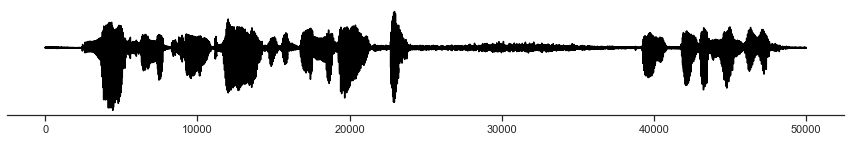

In [75]:
#sns.set_context("poster", font_scale = 0.4, rc={"grid.linewidth": 0.2});

#sns.set_style("ticks")
#sns.set_context("poster")
sns.set()
sns.set_style('ticks')
peakcut = sounddata[550000:600000]

plt.figure(figsize= (15,2));
plt.plot(peakcut, color ='black');
#plt.xlim([0,sounddata.shape[0]]);
sns.despine(left=True);
plt.yticks([]) ;
#plt.xlim([0, sounddata.shape[0]]);
#plt.xticks(np.arange(0,sounddata.shape[0]+1, 50*samplerate), np.arange(0,451,50));
#plt.xticklabels(np.arange(0,450,50));
wavtitle = '../data_pieman/democut.wav'
write(wavtitle, samplerate, peakcut)
Audio(wavtitle, )

In [76]:
fmri_data = np.load('../data_pieman/fmri_data_pieman.npy')
print(fmri_data.shape)


data = fmri_data.copy()
data = np.swapaxes(data, 0,1)
data = np.swapaxes(data, 1,2)
print(data.shape)

shen_pauli_aan_file       = '../data_pieman/allcombined.nii'
shen_pauli_aan_masker = nilearn.input_data.NiftiLabelsMasker(labels_img=shen_pauli_aan_file);
sample_file = '../data_pieman/func.nii'
shen_pauli_aan_masker.fit_transform(sample_file);

shen_pauli_aan_dict = np.load('../data_pieman/shen_pauli_aan_dict.npy', allow_pickle=True).item()

key_regions         = [62, 50, 271]
key_regions_label   = ['Auditory Cortex', 'TPJ', 'N Accumbens']
colorlist           = ['green', 'blue', 'red']

(68, 300, 293)
(300, 293, 68)


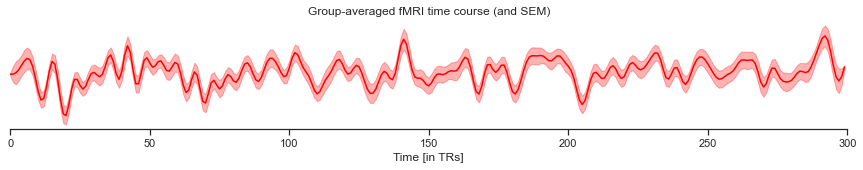

In [80]:
plt.figure(figsize= (15,2));

count = 2   
curr_roi = shen_pauli_aan_dict[key_regions[count]]['data_array_index']

curr_data = data[:,curr_roi,:]
x = np.arange(curr_data.shape[0])
y = np.mean(curr_data, axis =1) 
yerr = np.std(curr_data, axis =1)/np.sqrt(curr_data.shape[1])
    
errorfill(x, y, yerr, color=colorlist[count]);

    
plt.title('Group-averaged fMRI time course (and SEM)');
plt.xlim([0,300])
plt.yticks([]) 
sns.despine(left=True);


plt.xlabel('Time [in TRs]')
plt.show()


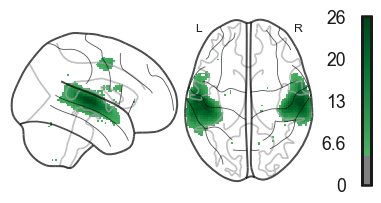

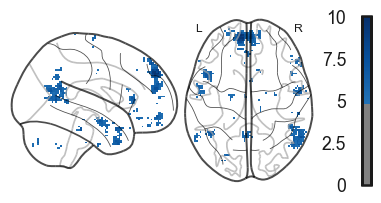

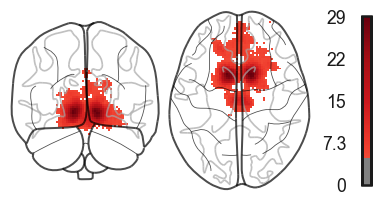

In [113]:
plotting.plot_glass_brain('../data_pieman/auditory_association-test_z_FDR_0.01.nii.gz', 
                          colorbar=True, 
                          cmap = 'Greens',
                          threshold=5.,
                          plot_abs=True, 
                          display_mode='xz',
                          #figure=plt.figure(figsize=(6, 3)),
                         );

plotting.plot_glass_brain('../data_pieman/social cognition_association-test_z_FDR_0.01.nii.gz', 
                          colorbar=True, 
                          cmap = 'Blues',
                          threshold=5.,
                          plot_abs=True, 
                          display_mode='xz',
                          #figure=plt.figure(figsize=(6, 3)),
                         );

plotting.plot_glass_brain('../data_pieman/reward_association-test_z_FDR_0.01.nii.gz', 
                          colorbar=True, 
                          cmap = 'Reds',
                          annotate = False,
                          threshold=5.,
                          plot_abs=True, 
                          display_mode='yz',
                          #figure=plt.figure(figsize=(6, 3)),
                         );

{'coords': [39.788649706457925, -25.643835616438352, 14.450097847358123], 'name': "31.31% Parietal_Operculum_Cortex; 24.07% Planum_Temporale; 21.33% Heschl's_Gyrus_(includes_H1_and_H2); 21.33% Insular_Cortex", 'index_label': 62, 'data_array_index': 61}


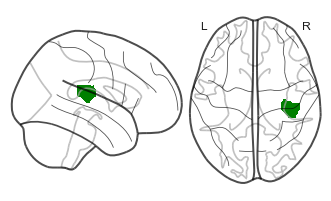

{'coords': [48.86702127659574, -58.01329787234043, 14.295212765957444], 'name': '35.64% Angular_Gyrus; 25.13% Middle_Temporal_Gyrus_temporooccipital_part; 22.21% Lateral_Occipital_Cortex_inferior_division; 16.62% Lateral_Occipital_Cortex_superior_division', 'index_label': 50, 'data_array_index': 49}


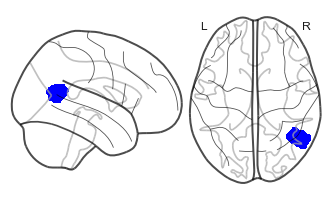

{'coords': [0.6507936507936449, 7.69841269841271, -8.841269841269842], 'name': 'N Accumbens', 'index_label': 271, 'data_array_index': 270}


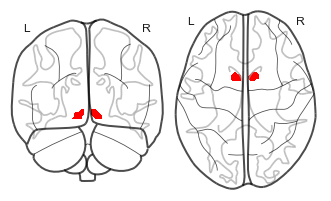

In [104]:
shen_pauli_aan_dict = np.load('../data_pieman/shen_pauli_aan_dict.npy', allow_pickle=True).item()

key_regions         = [62, 50, 271]
key_regions_label   = ['Auditory Cortex', 'TPJ', 'N Accumbens']
colorlist           = ['green', 'blue', 'red']
modes               = ['xz', 'xz', 'yz']


for count in range(3):
    
    curr_region_dictidx = key_regions[count]
    print(shen_pauli_aan_dict[curr_region_dictidx])
    
    all_file       = '../data_pieman/allcombined.nii'
    all_img        = nilearn.image.load_img(all_file)
    all_data       = all_img.get_fdata()

    all_data[np.where(all_data!= curr_region_dictidx)] = 0
    all_new_img    = new_img_like(all_img, all_data.astype(int))

    current_title  = key_regions_label[count]
    display = plotting.plot_glass_brain(None,
                                        display_mode = modes[count],
                                        #title = current_title,
                                       )
    display.add_contours(all_new_img, filled=True, colors=colorlist[count])
    plt.show()